## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

# Objectives:
1. How does viewership vary along the episodes?
    - A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:
        - Ratings < 0.25 are colored "red"
        - Ratings >= 0.25 and < 0.50 are colored "orange"
        - Ratings >= 0.50 and < 0.75 are colored "lightgreen"
        - Ratings >= 0.75 are colored "darkgreen"
    - A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25.
    - Stars represent episodes which contain guest stars.
2. The guest stars of the most watched Office episode.

In [1]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
office_episodes = pd.read_csv("datasets/office_episodes.csv")

office_episodes.head(2)

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125


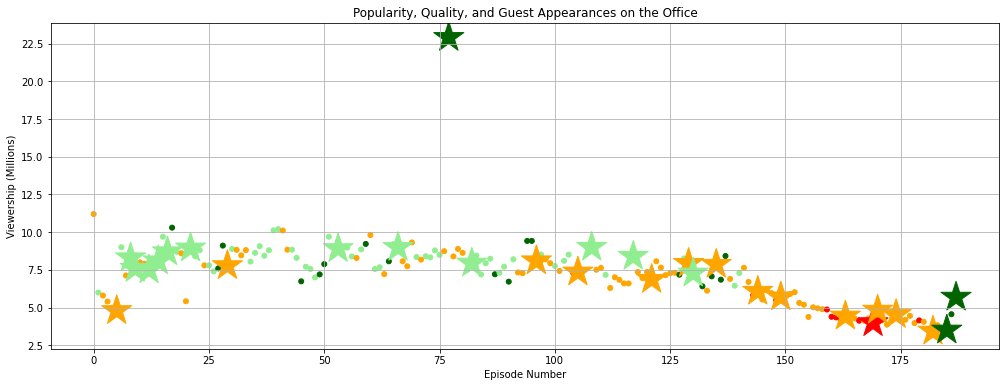

In [39]:
# Creating a list of colors based on scaled ratings

colors = []

for lab,row in office_episodes.iterrows():
    if row["scaled_ratings"] < 0.25:
        colors.append("red")
    elif row["scaled_ratings"] <0.50:
        colors.append("orange")
    elif row["scaled_ratings"] <0.75:
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")
        
# Creating a list of sizes based on guest appearances

sizes = []

for _,row in office_episodes.iterrows():
    if row["has_guests"] == True:
        sizes.append(1000)
    else:
        sizes.append(25)
        
# Adding 2 new columns in to the existing dataframe - colors and sizes

office_episodes["colors"]= colors

office_episodes["sizes"]= sizes

office_episodes.head(2)

# differentiate guest appearances not just with size, but also with a star

# Creating a scatter plot
# fig = plt.figure()
plt.figure(figsize=(17,6))
# plt.scatter(office_episodes["episode_number"],office_episodes["viewership_mil"],c=colors,s=sizes,marker="*")
plt.scatter(office_episodes.loc[office_episodes["has_guests"] == False]["episode_number"],
            office_episodes.loc[office_episodes["has_guests"] == False]["viewership_mil"],
            c=office_episodes.loc[office_episodes["has_guests"] == False]["colors"],
            s=office_episodes.loc[office_episodes["has_guests"] == False]["sizes"],
            marker="o")
plt.scatter(office_episodes.loc[office_episodes["has_guests"] == True]["episode_number"],
            office_episodes.loc[office_episodes["has_guests"] == True]["viewership_mil"],
            c=office_episodes.loc[office_episodes["has_guests"] == True]["colors"],
            s=office_episodes.loc[office_episodes["has_guests"] == True]["sizes"],
            marker="*")
plt.grid()
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()


In [12]:
# Name of the guest stars who were in the most watched Office episode

most_watched_episode = office_episodes.loc[office_episodes["viewership_mil"].idxmax()]

top_stars = most_watched_episode["guest_stars"].split(", ")
top_stars

['Cloris Leachman', 'Jack Black', 'Jessica Alba']